In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

In [3]:
data = pd.read_csv(r"C:\Users\Amit kumar\Desktop\Projects\EmployeeSalaryPrediction\adult 3.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.shape

(48842, 15)

In [5]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [7]:
data.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [8]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [9]:
data['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [10]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [11]:
data.occupation.replace({'?':'Others'},inplace = True)

C:\Users\Amit kumar\AppData\Local\Temp\ipykernel_4468\1679451683.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace = True)


In [12]:
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [13]:
data.workclass.replace({'?':'Notlisted'},inplace = True)

C:\Users\Amit kumar\AppData\Local\Temp\ipykernel_4468\2790258626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Notlisted'},inplace = True)


In [14]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [15]:
data = data[data['workclass']!='Without-pay']
data = data[data['workclass']!='Never-worked']

In [16]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64

In [18]:
data.shape

(48811, 15)

In [19]:
data.drop(columns=['education'],inplace=True)

In [20]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Notlisted,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K


<function matplotlib.pyplot.show(close=None, block=None)>

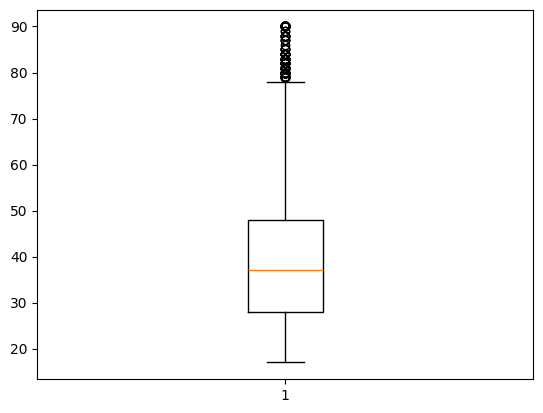

In [21]:
#Outlier Detection
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show

In [22]:
data = data[(data['age']<=75) & (data['age']>=17)]


<function matplotlib.pyplot.show(close=None, block=None)>

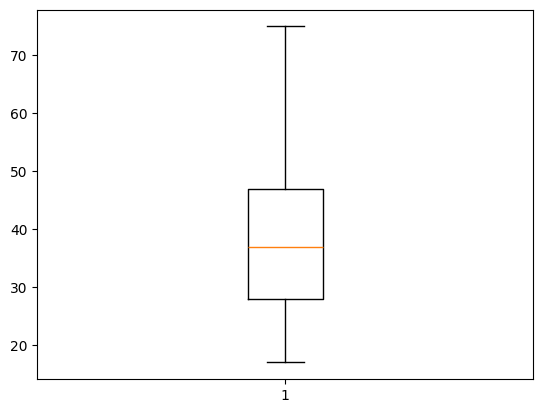

In [23]:
plt.boxplot(data['age'])
plt.show

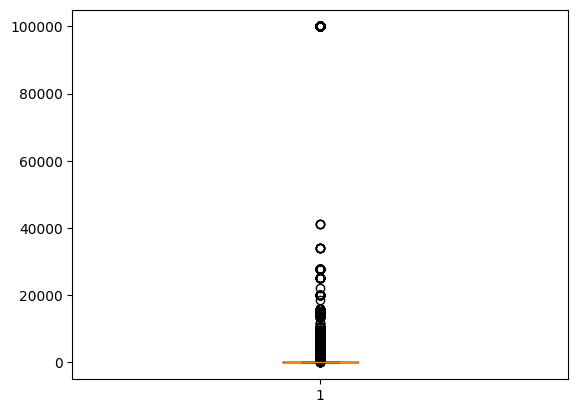

In [24]:
plt.boxplot(data['capital-gain'])
plt.show()

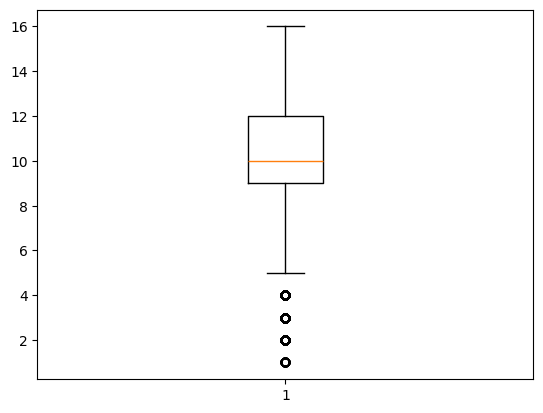

In [25]:
plt.boxplot(data['educational-num'])
plt.show()

In [26]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

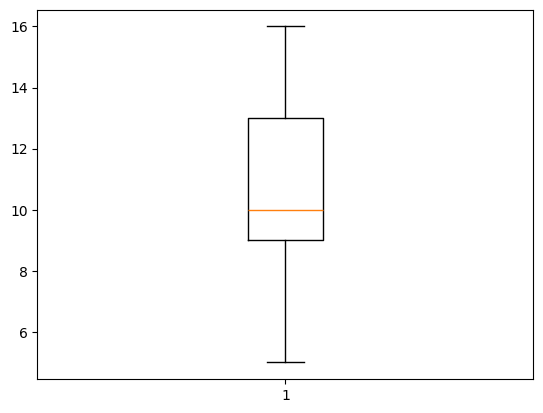

In [27]:
plt.boxplot(data['educational-num'])
plt.show()

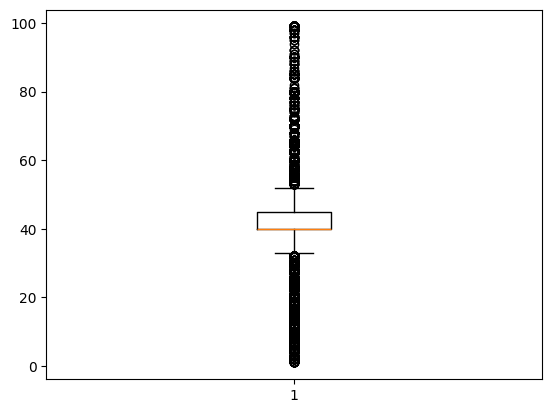

In [28]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [29]:
# Label Encoding of categorical variables
encoder = LabelEncoder()
for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    data[col] = encoder.fit_transform(data[col])

In [30]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K


In [31]:
X = data.drop(columns=['income'])
y= data['income']
X

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [33]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0.13793103 0.5        0.14512876 ... 0.         0.39795918 0.95121951]
 [0.36206897 0.5        0.05245126 ... 0.         0.5        0.95121951]
 [0.18965517 0.16666667 0.21964867 ... 0.         0.39795918 0.95121951]
 ...
 [0.70689655 0.5        0.09446153 ... 0.         0.39795918 0.95121951]
 [0.0862069  0.5        0.12800425 ... 0.         0.19387755 0.95121951]
 [0.60344828 0.66666667 0.18648211 ... 0.         0.39795918 0.95121951]]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23, stratify = y)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37376, 13), (9344, 13), (37376,), (9344,))

In [36]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

In [37]:
# Train, evaluate and compare models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    print("="*50)


LogisticRegression Accuracy: 0.8203
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7038
        >50K       0.72      0.45      0.55      2306

    accuracy                           0.82      9344
   macro avg       0.78      0.70      0.72      9344
weighted avg       0.81      0.82      0.80      9344


RandomForest Accuracy: 0.8586
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7038
        >50K       0.75      0.64      0.69      2306

    accuracy                           0.86      9344
   macro avg       0.82      0.78      0.80      9344
weighted avg       0.85      0.86      0.85      9344


KNN Accuracy: 0.8252
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      7038
        >50K       0.67      0.58      0.62      2306

    accuracy                           0.83      9344
   macro avg       0.77      0.74     

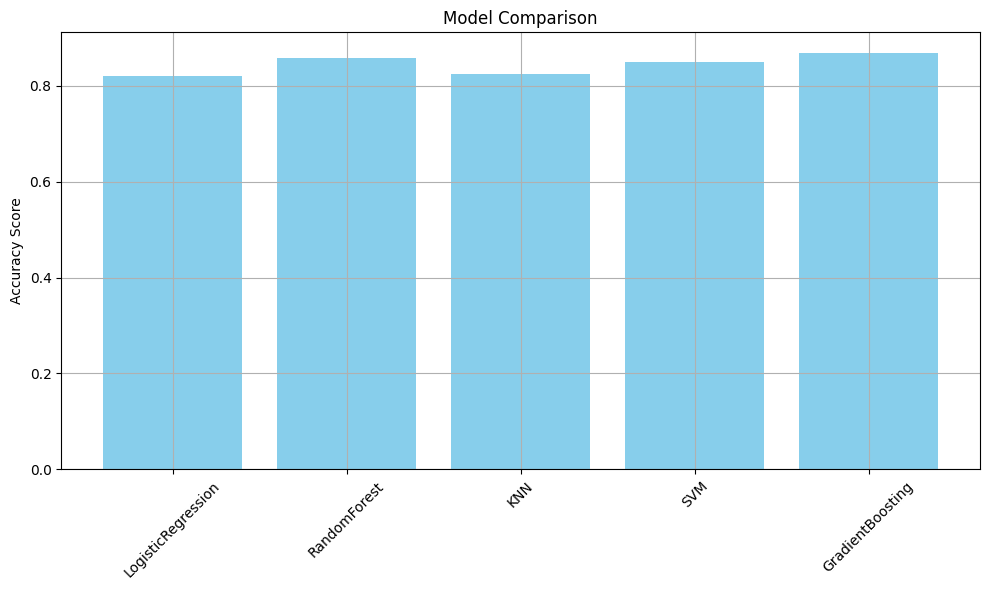

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# Save the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
joblib.dump(best_model, "best_model.pkl")
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")
print("✅ Saved best model as best_model.pkl")

# Save the scaler for streamlit use
joblib.dump(scaler, "scaler.pkl")
print("✅ Saved scaler as scaler.pkl")


✅ Best model: GradientBoosting with accuracy 0.8678
✅ Saved best model as best_model.pkl
✅ Saved scaler as scaler.pkl
